In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
sns.set()

## Importing the Dataset :


In [91]:
raw_data=pd.read_csv("data.csv")
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


### Copying raw_data elements into the data variable

In [92]:
data=raw_data.copy()

#### Converting all the yes/no into a numerical data of 1 and 0's

In [93]:
data['Attendance']=data['Attendance'].map({'Yes':1,'No':0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


 ### Info About the Data

In [94]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


#### In here the mean of attendance is ~0.46 that means 46% students have attend the 60% of the classes 

In [95]:
# we have calculate the summary statistics without the attandance variable
y=data['GPA']
x1=data['SAT']
xsim=sm.add_constant(x1) #xsim is basically a group of const and sat score
result=sm.OLS(y,xsim).fit()
result.summary()




/home/sk/anaconda3/envs/deep/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           7.20e-11
Time:                        21:44:06   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The Standard equation is y=b<sub>0</sub>x<sub>0</sub>+b<sub>1</sub>x<sub>1</sub>here const performs as x<sub>0</sub> as 1



## From the Above summary,we got that the equation is <span style="color:red"> y=0.2750 + 0.0017 * SAT </span>

We will plot the scatterplot with matplotlib

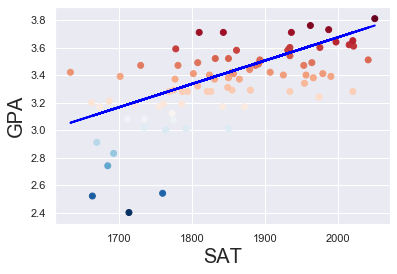

In [96]:
plt.scatter(data['SAT'],y,c=data['GPA'],cmap='RdBu_r')
y=0.2750 + 0.0017 * data['SAT']
fig=plt.plot(data['SAT'],y,lw=2,c='blue')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [97]:
y=data['GPA']
x1=data[['SAT','Attendance']]

### In-orer to a the constant we need to use smm method. Then we fit the regression and get the summary  Y=b<sub>0</sub>+b<sub>1</sub>x<sub>1</sub>

In [98]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           2.19e-15
Time:                        21:44:07   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### adjusted r-squared value is 0.555 which is great. The equation looks like  GPA= 0.06439  + 0.0014* SAT + 0.2226  * Attendance

If the student didn't attend the attendance=0 then GPA=0.06439 + 0.0014 * SAT

If the student Attend then attendance=1 then GPA= 0.08665 + 0.0014 * SAT

So we need to plot two equation Y^yes and Y^no

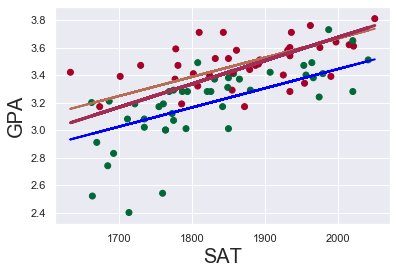

In [99]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yno=0.6439 + 0.0014 * data['SAT']
yyes=0.8665 + 0.0014 * data['SAT']
y=0.2750 + 0.0017 * data['SAT']
fig=plt.plot(data['SAT'],yno,lw=2,c='blue')
fig=plt.plot(data['SAT'],yyes,lw=2,c='#b96c54')
fig=plt.plot(data['SAT'],y,lw=3,c='#a12c54')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

### Prediction Method

In [100]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


### Lets create a new dataframe to check our model

In [101]:
check_data=pd.DataFrame({'const':1,'SAT':[1700,1650],'Attendance':[0,1]})
check_data=check_data[['const','SAT','Attendance']]
check_data

,const,SAT,Attendance
0,1,1700,0
1,1,1650,1


### Now Ommit the index no into names

In [108]:
check_data.rename(index={0:'asif',1:'suhail'})
check_data

,const,SAT,Attendance
0,1,1700,0
1,1,1650,1


In [107]:
prediction=result.predict(check_data)
prediction

0    3.023513
1    3.176167
dtype: float64

In [ ]:
predictiondf=pd.DataFrame({'Prediction':prediction})
joined=check_data.join(predictiondf)